In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pywaffle import Waffle


In [5]:
# Import data
columns_to_be_removed = ['Datasource']
Human_traff = pd.read_csv('human_trafficking.csv', low_memory=False).drop(columns_to_be_removed, axis = 'columns')
Human_traff.head()
Human_traff.dtypes






yearOfRegistration                   int64
gender                              object
ageBroad                            object
majorityStatus                      object
majorityStatusAtExploit             object
                                     ...  
recruiterRelationIntimatePartner     int64
recruiterRelationFriend              int64
recruiterRelationFamily              int64
recruiterRelationOther               int64
recruiterRelationUnknown             int64
Length: 62, dtype: object

   gender  counts
0  Female   35534
1    Male   13267


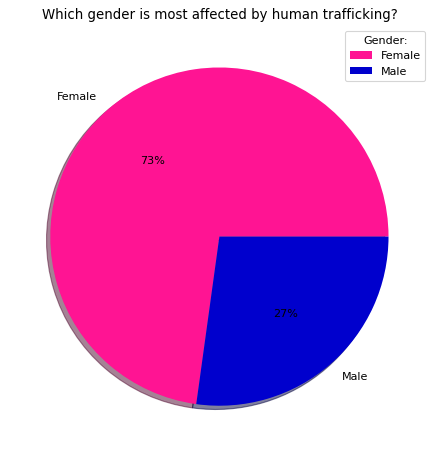

In [6]:
# Prepare data
Human_traff_Gender = Human_traff.groupby('gender').size().reset_index(name='counts')
print(Human_traff_Gender)
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

# Draw pie plot
data = Human_traff_Gender['counts']
categories = Human_traff_Gender['gender']
mycolors = ["deeppink", "mediumblue"]

plt.pie(data, labels = categories,colors = mycolors,autopct='%1.0f%%',shadow = True)
plt.legend(title = "Gender:")
plt.title("Which gender is most affected by human trafficking?")

plt.show() 



In [7]:
# Replace missing values with NaN
Human_traff.replace('-99', np.nan, inplace=True)
Human_traff.replace(-99, np.nan, inplace=True)
Human_traff[:5]

,yearOfRegistration,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,2002,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,2002,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,2002,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,2002,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


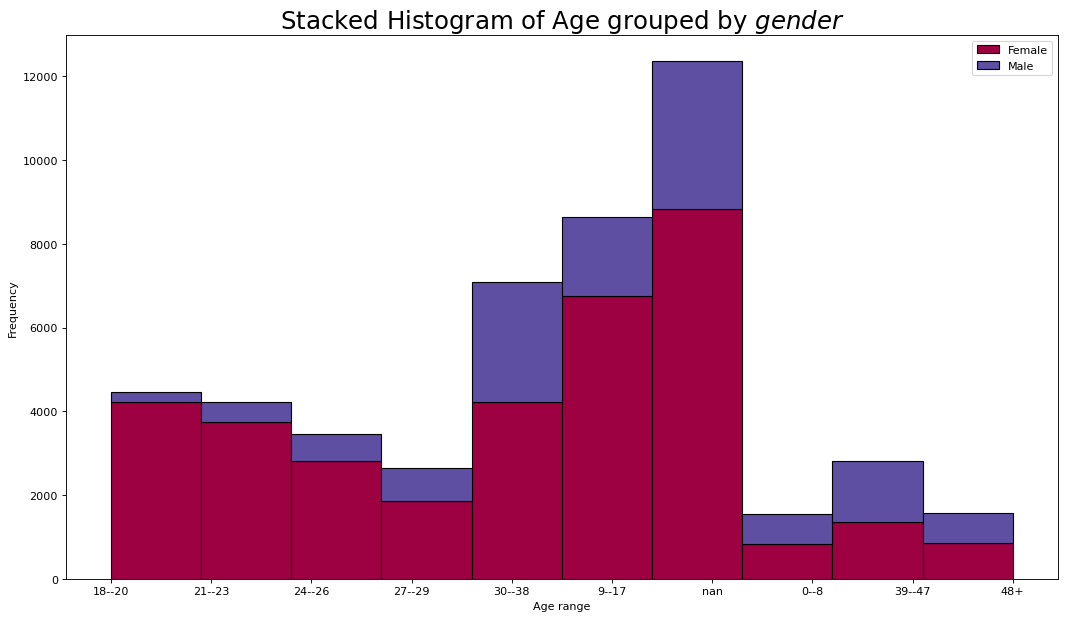

In [8]:
# Preparing data
x_variable ='ageBroad'
groupby_variable = 'gender'
genderHuman_traff_agg = Human_traff.loc[:, [x_variable, groupby_variable]].groupby(groupby_variable)
vals = [Human_traff[x_variable].values.tolist() for i, Human_traff in genderHuman_traff_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, Human_traff[x_variable].unique().__len__(), stacked=True, edgecolor='black',density=False,color=colors[:len(vals)])


# Decoration
plt.legend({group:col for group, col in zip(np.unique(Human_traff[groupby_variable]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Age grouped by ${groupby_variable}$", fontsize=22)
plt.xlabel("Age range")
plt.ylabel("Frequency")

plt.show()

Threats                       2950.0
Withholds documents           1037.0
Debt bondage                   842.0
Sexual abuse                  1572.0
Physical Abuse                 724.0
Psychological abuse           3562.0
Withholds necessities          787.0
Excessive working hours        877.0
False promises                1369.0
Takes earnings                1465.0
Restricts movement            3241.0
Restricts medical care         583.0
Psychoactive substances       2224.0
Threat of law enforcement      390.0
Other                         1762.0
Physical abuse                2276.0
Not specified                 5531.0
Uses children                  117.0
Restricts financial access     116.0
dtype: float64
Restricts medical care        702.0
Sexual abuse                   51.0
Takes earnings               1333.0
Withholds documents          1053.0
Threats                      1031.0
Withholds necessities         572.0
Psychoactive substances        63.0
Threat of law enforcement     

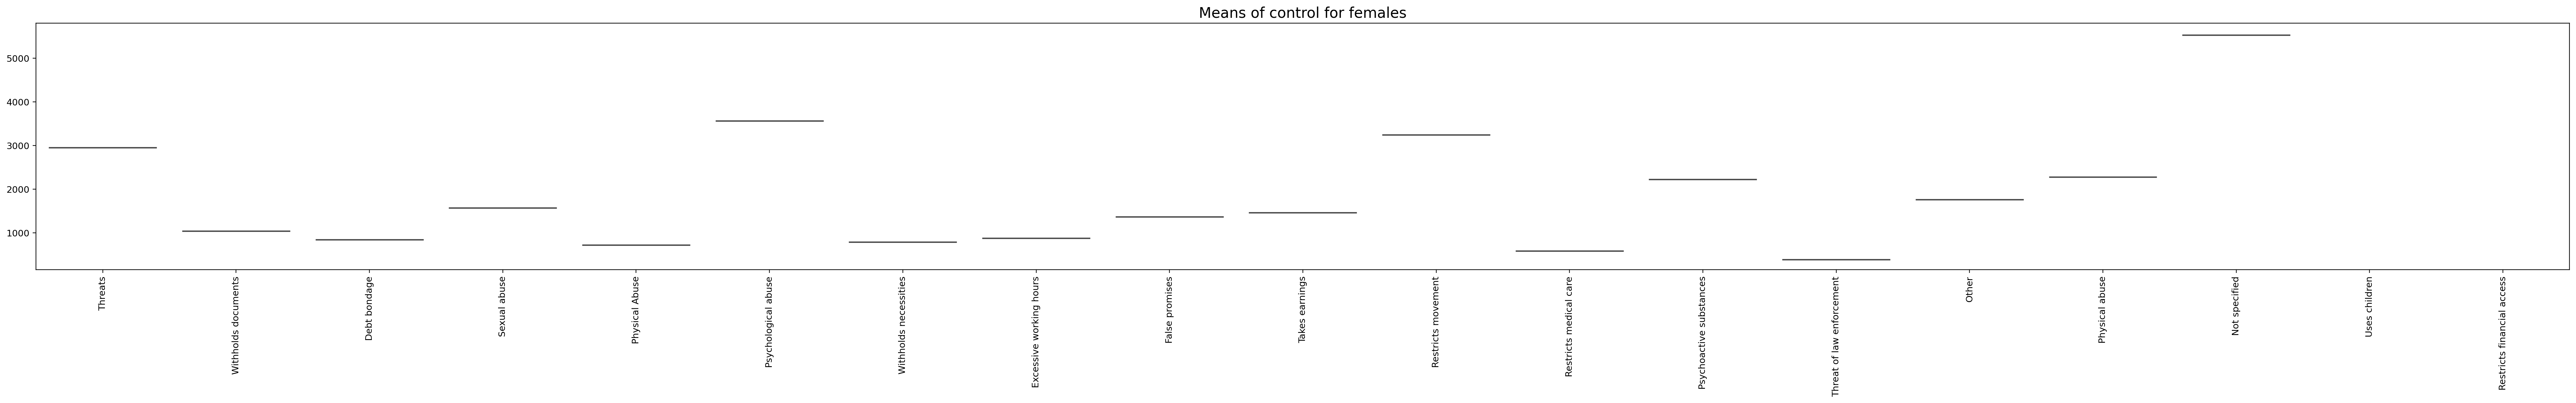

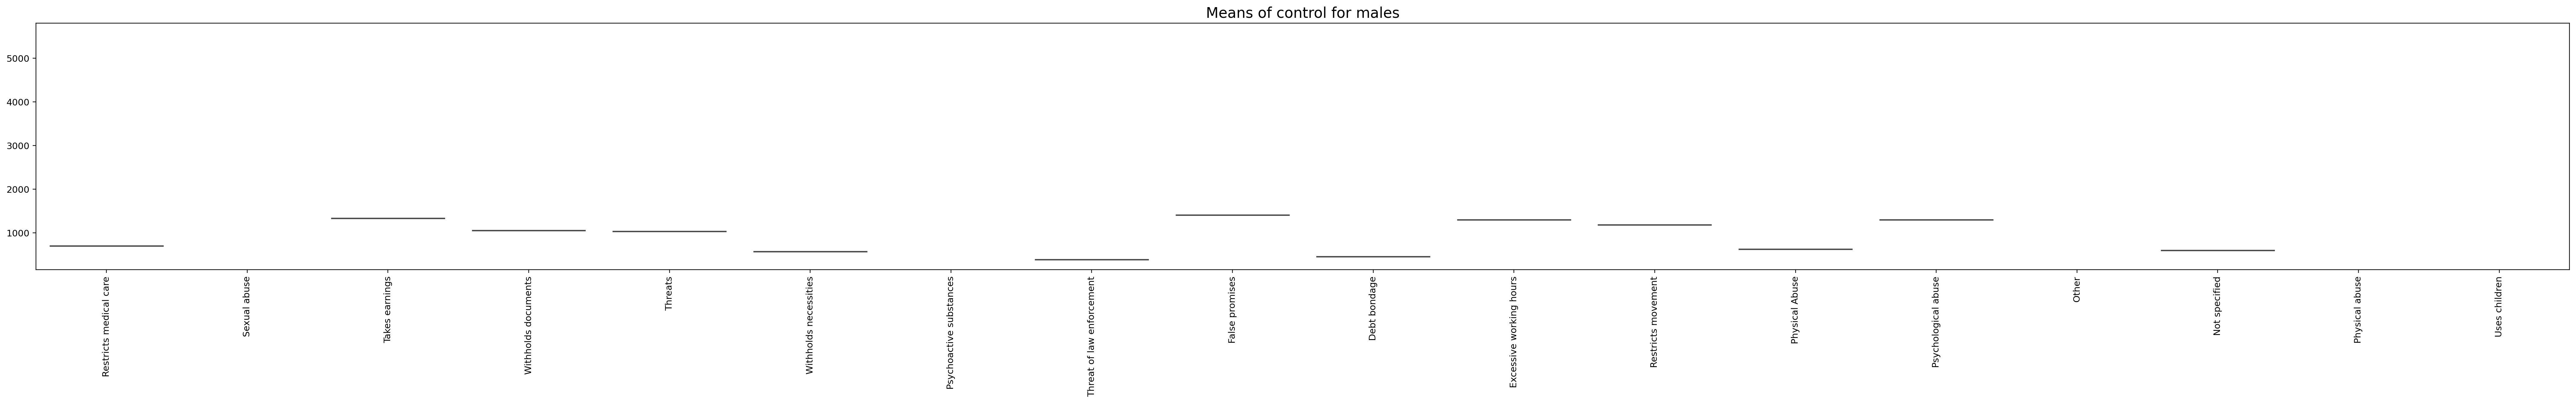

In [9]:
# Preparing data
means_of_control = Human_traff['meansOfControlConcatenated'].str.replace('Abuse', 'abuse', regex=True)
means_of_control_f = Human_traff[(Human_traff.meansOfControlConcatenated.notna()) & (Human_traff.gender == 'Female')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
means_of_control_m = Human_traff[(Human_traff.meansOfControlConcatenated.notna()) & (Human_traff.gender == 'Male')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
print(means_of_control_f)
print(means_of_control_m)

fig, ax = plt.subplots(figsize=(50,5),dpi=220)
ax = sns.violinplot(x=means_of_control_f.index, y=means_of_control_f,scale='area',inner="stick", alpha=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_title('Means of control for females', fontsize=16);
ax.set_ylim(bottom=154.75, top=5801.75)

plt.show()

fig, ax = plt.subplots(figsize=(50,5),dpi=220)
ax = sns.violinplot(x=means_of_control_m.index, y=means_of_control_m,scale='area',inner="stick", alpha=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_title('Means of control for males', fontsize=16);
ax.set_ylim(bottom=154.75, top=5801.75)

plt.show()





In [10]:
HT_indicators = pd.read_stata("/Users/olatu/Documents/Data science/University projects/Principles of data science/HTI 00-11 stata12.dta")
print(HT_indicators.dtypes)
print('\n')
print(HT_indicators.columns)

country            object
ccode             float32
year                int16
tier             category
minstand         category
                   ...   
CEDAW_rat          object
UNCRC_sign         object
UNCRC_rat          object
conflict_sign      object
conflict_rat       object
Length: 67, dtype: object


Index(['country', 'ccode', 'year', 'tier', 'minstand', 'efforts',
       'TRAFFICKING_FLOWS', 'source', 'source_order', 'transit',
       'transit_order', 'destination', 'destination_order', 'internal',
       'TRAFFICKING_TYPES', 'psource', 'ptransit', 'pdest', 'pinternal',
       'lsource', 'ltransit', 'ldest', 'linternal', 'dsource', 'dtransit',
       'ddest', 'dinternal', 'dssource', 'dstransit', 'dsdest', 'dsinternal',
       'cpsource', 'cptransit', 'cpdest', 'cpinternal', 'clsource',
       'cltransit', 'cldest', 'clinternal', 'cssource', 'cstransit', 'csdest',
       'csinternal', 'PROSECUTION', 'domesticlaws', 'enforcement',
       'convictinfo', 'prosnum', 'PROTECTIO

       Country name  COW country code  Year TIP Tier, special cases=-99  \
0     United States               2.0  2001                Special Case   
1     United States               2.0  2002                Special Case   
2     United States               2.0  2003                Special Case   
3     United States               2.0  2004                Special Case   
4     United States               2.0  2005                Special Case   
...             ...               ...   ...                         ...   
1582          Palau             986.0  2010         Tier 2/2 Watch List   
1583          Palau             986.0  2011         Tier 2/2 Watch List   
1584     Micronesia             987.0  2009         Tier 2/2 Watch List   
1585     Micronesia             987.0  2010         Tier 2/2 Watch List   
1586     Micronesia             987.0  2011                      Tier 3   

     Fully comply with minimum standards  \
0                             No mention   
1          

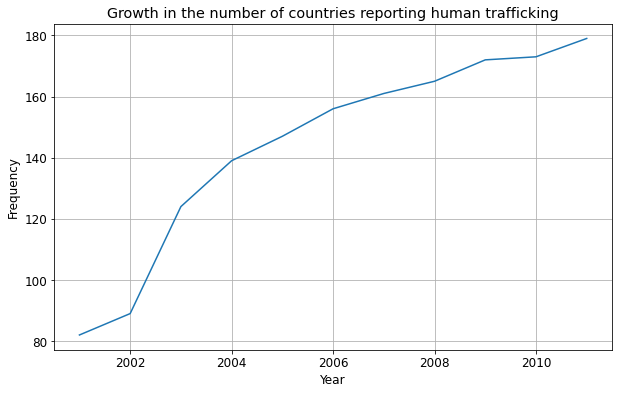

In [20]:

df = pd.read_stata("/Users/olatu/Documents/Data science/University projects/Principles of data science/HTI 00-11 stata12.dta")

FeatureName = pd.io.stata.StataReader("/Users/olatu/Documents/Data science/University projects/Principles of data science/HTI 00-11 stata12.dta").variable_labels()

# replace column names with label names
Hf_labeled = HT_indicators.rename(columns =FeatureName)
print(Hf_labeled)

Hf_labeled.describe()

# Extract data
law_count = Hf_labeled.Year.value_counts().sort_index().to_frame()
print(year_count)

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# use the plot function
plt.plot(law_count)

# Customize graph
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Growth in the number of countries reporting human trafficking')
ax.grid(True)
 







In [19]:
# Preparing data
international_variable ='enforcement'
groupby_variable = 'INTERNATIONAL_LAWS'
genderHuman_traff_agg = df.loc[:, [international_variable, groupby_variable]].groupby(groupby_variable)
vals = [df[international_variable].values.tolist() for i, df in genderHuman_traff_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)

n, bins, patches = plt.hist(vals, Human_traff[x_variable].unique().__len__(), stacked=True, edgecolor='black',density=False


# Decoration
plt.legend({group:col for group, col in zip(np.unique(Human_traff[groupby_variable]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Law enforcement grouped by ${groupby_variable}$", fontsize=22)
plt.xlabel("Law enforcement")
plt.ylabel("Frequency")

plt.show()


SyntaxError: invalid syntax (<ipython-input-19-a386ad67c185>, line 14)

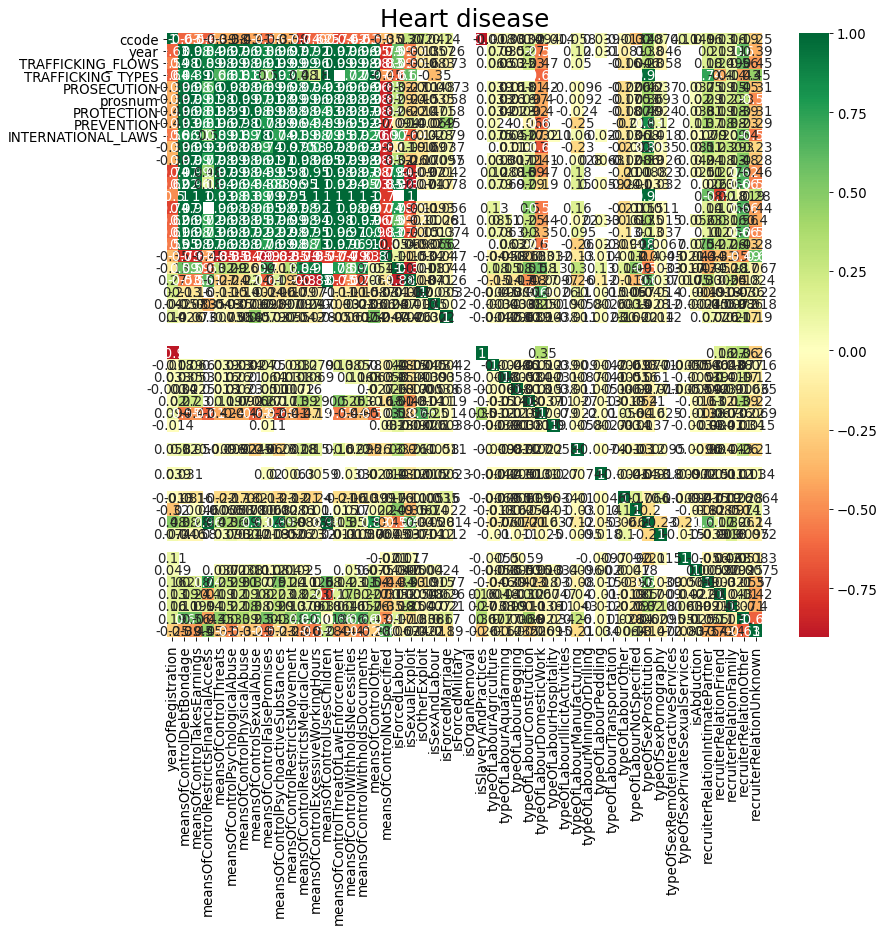

In [22]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(Human_traff.corr(), xticklabels=Human_traff.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Heart disease', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()